In [50]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline


In [51]:
import pandas as pd

# Read the CSV file into a DataFrame
dataset = pd.read_csv('/content/Training.csv')




In [52]:
dataset.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [53]:
dataset.shape

(4920, 133)

In [54]:
# Check for missing values
print("Missing values in each column:")
print(dataset.isnull().sum())

Missing values in each column:
itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


In [55]:
dataset['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [56]:
len(dataset['prognosis'].unique())

41

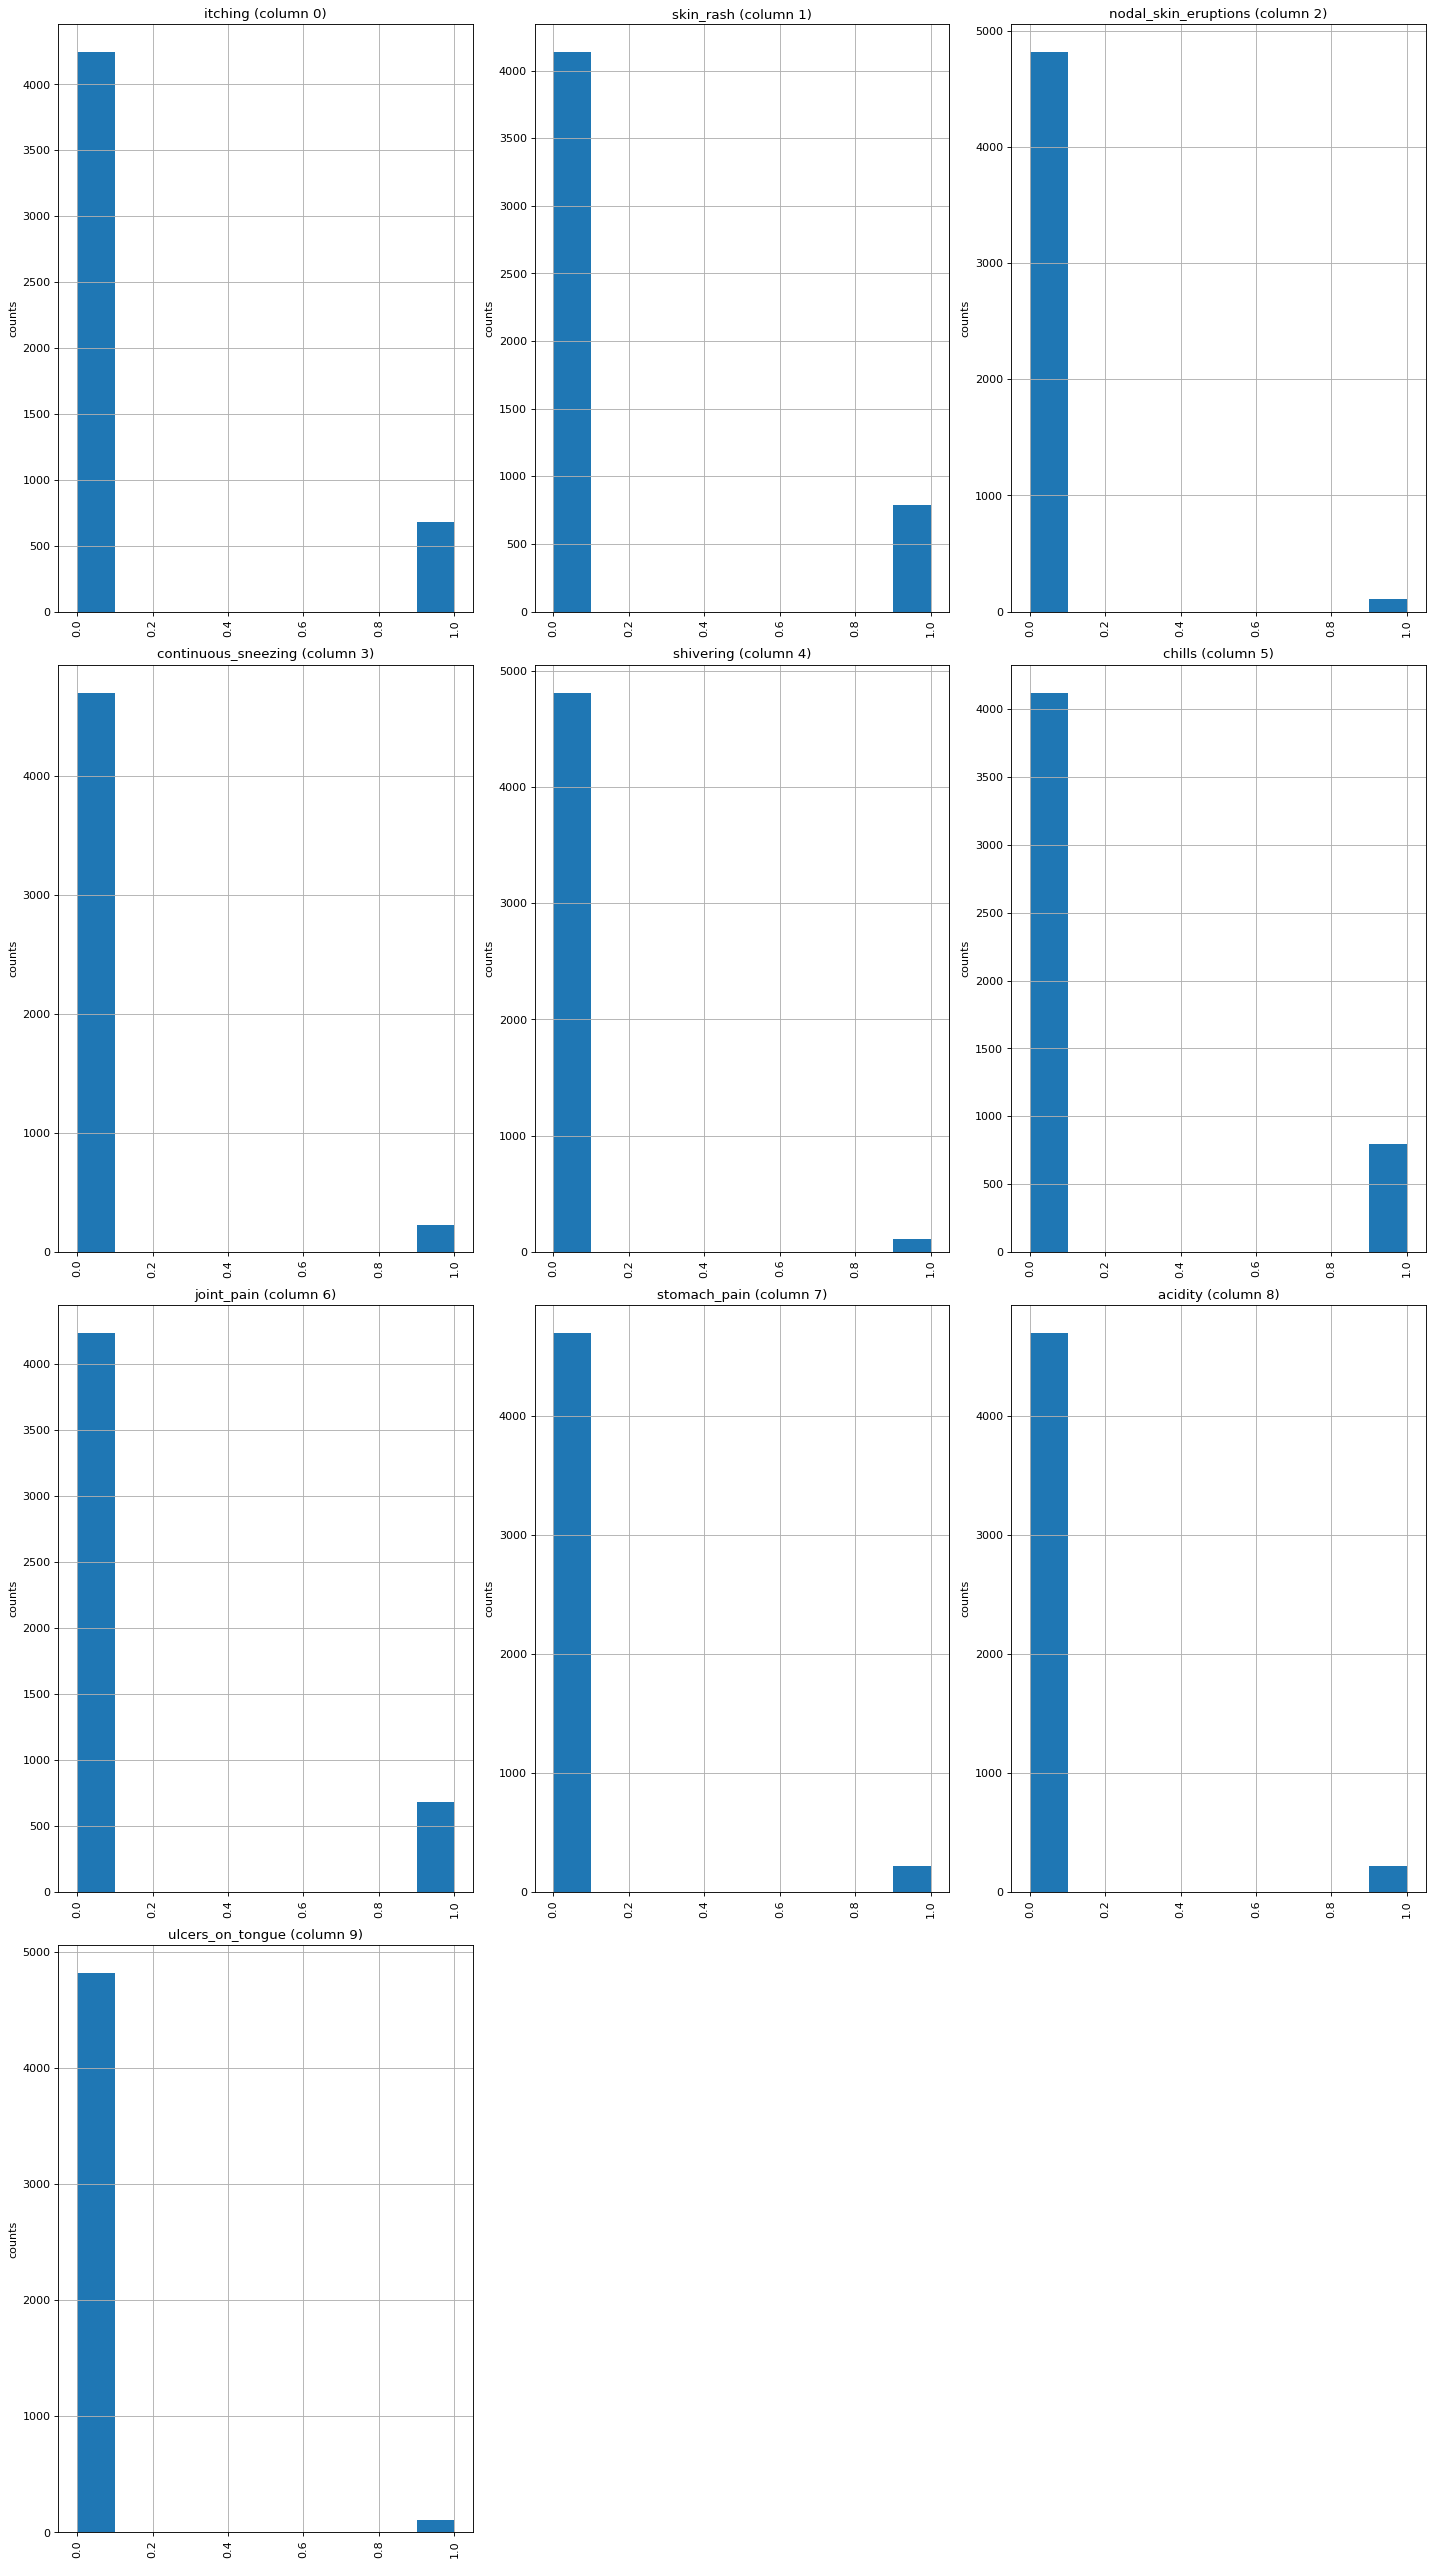

In [57]:

df = pd.read_csv('/content/Training.csv')

nunique = df.nunique()
df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]

nRow, nCol = df.shape
columnNames = list(df)
nGraphRow = math.ceil((nCol + 3 - 1) / 3)
plt.figure(num=None, figsize=(6 * 3, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')

for i in range(min(nCol, 10)):
    plt.subplot(nGraphRow, 3, i + 1)
    columnDf = df.iloc[:, i]
    if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
        valueCounts = columnDf.value_counts()
        valueCounts.plot.bar()
    else:
        columnDf.hist()
    plt.ylabel('counts')
    plt.xticks(rotation=90)
    plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

plt.show()

Confusion Matrix:
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]


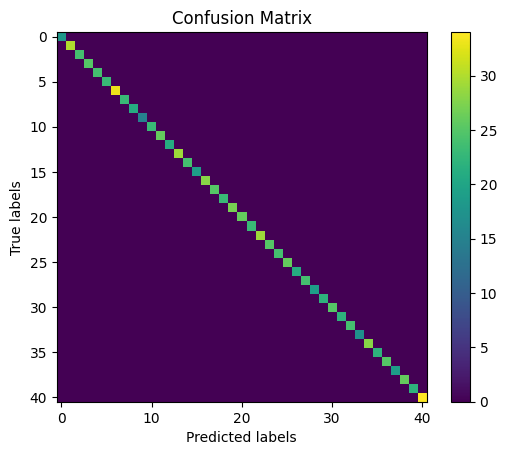

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Load your dataset
df = pd.read_csv('/content/Training.csv')

# Assuming the last column is the target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# Plot the confusion matrix
plt.imshow(conf_mat, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# **Train Test Split**

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [60]:
X=dataset.drop('prognosis',axis=1)
y=dataset['prognosis']

In [61]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [62]:
y

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [63]:
le=LabelEncoder()
le.fit(y)
Y=le.transform(y)

In [64]:
Y#fungal became 15

array([15, 15, 15, ..., 38, 35, 27])

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=20)

In [66]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape#70% in train

((3444, 132), (1476, 132), (3444,), (1476,))

# **TRAINING TOP MODEL TO CHOOSE BEST ONE**

In [67]:
from sklearn.datasets import make_multilabel_classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix
import numpy as np

#creating dictionary to store models
models={
    "SVC":SVC(kernel="linear"),
    "RandomForestClassifier":RandomForestClassifier(n_estimators=100,random_state=123),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=100,random_state=34),
    "MultinomialNB":MultinomialNB(),
    "KNeighborsClassifier":KNeighborsClassifier(n_neighbors=5)
}
for model_name,model in models.items():
  #training model
  model.fit(X_train,y_train)

  #testing model
  predictions=model.predict(X_test)

  #calculating accuracy
  accuracy=accuracy_score(y_test,predictions)

  #confusion matrix
  cm=confusion_matrix(y_test,predictions)

  #printing results
  print(f"{model_name}: accuracy:{accuracy}")
  print(f"{model_name}: confusion matrix:{cm}")
  print(np.array2string(cm,separator=', '))#converting from array to string
#creating function to train and evaluate models

#diagonails above and below is 0 means good model

SVC: accuracy:1.0
SVC: confusion matrix:[[40  0  0 ...  0  0  0]
 [ 0 43  0 ...  0  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ... 34  0  0]
 [ 0  0  0 ...  0 41  0]
 [ 0  0  0 ...  0  0 31]]
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]
RandomForestClassifier: accuracy:1.0
RandomForestClassifier: confusion matrix:[[40  0  0 ...  0  0  0]
 [ 0 43  0 ...  0  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ... 34  0  0]
 [ 0  0  0 ...  0 41  0]
 [ 0  0  0 ...  0  0 31]]
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]
GradientBoostingClassifier: accuracy:1.0
GradientBoostingClassifier: confusion matrix:[[40  0  0 ...  0  0  0]
 [ 0 43  0 ...  0  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0 

# **Single Prediction**

In [68]:
svc=SVC(kernel="linear")
svc.fit(X_train,y_train)
ypred=svc.predict(X_test)
accuracy_score(y_test,ypred)

1.0

In [69]:
import pickle
pickle.dump(svc,open("svc.pkl",'wb'))

In [70]:
svc=pickle.load(open("/content/svc.pkl",'rb'))

In [71]:
#test 1
print("Model Predicted Label:", svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Label:", y_test[0])

Model Predicted Label: [40]
Actual Label: 40


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [72]:
#test 2
print("Model Predicted Label:", svc.predict(X_test.iloc[10].values.reshape(1,-1)))
print("Actual Label:", y_test[10])

Model Predicted Label: [20]
Actual Label: 20


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# **DATABASE LOADING AND RECC LOGIC**





In [73]:
sym_des=pd.read_csv("/content/symtoms_df.csv")
precautions=pd.read_csv('/content/precautions_df.csv')
workout=pd.read_csv('/content/workout_df.csv')
description=pd.read_csv('/content/description.csv')
medications=pd.read_csv('/content/medications.csv')
diets=pd.read_csv('/content/diets.csv')

In [74]:
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    workout = wrkout[wrkout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [78]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("-------------Predicted disease----------")
print(predicted_disease)
print("------------Description------------")
print(desc)
print("--------------Precautions------------")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("------------Medications------------")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("----------Workout-------------")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("-----------Diets--------------")
for d_i in die:
    print(i, ": ", d_i)
    i += 1

Enter your symptoms.......acidity,joint_pain
=================predicted disease============
Urinary tract infection
=================description==================
Urinary tract infection is an infection in any part of the urinary system.
=================precautions==================
1 :  drink plenty of water
2 :  increase vitamin c intake
3 :  drink cranberry juice
4 :  take probiotics
=================medications==================
5 :  ['Antibiotics', 'Urinary analgesics', 'Phenazopyridine', 'Antispasmodics', 'Probiotics']
=================workout==================
6 :  Stay hydrated
7 :  Consume cranberry products
8 :  Include vitamin C-rich foods
9 :  Limit caffeine and alcohol
10 :  Consume probiotics
11 :  Avoid spicy and acidic foods
12 :  Consult a healthcare professional
13 :  Follow medical recommendations
14 :  Maintain good hygiene
15 :  Limit sugary foods and beverages
=================diets==================
16 :  ['UTI Diet', 'Hydration', 'Cranberry juice', 'Probiotics'

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
